In [3]:
# Import libraries
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.examples import sentences
from spacy import displacy
import matplotlib.pyplot as plt

In [4]:
# Load the spacy model in English language
nlp = spacy.load("en_core_web_sm")

# Stop words to remove from the texts
stop_words = nlp.Defaults.stop_words

### Testing Spacy

In [5]:
# Testing spacy

testing_spacy = 'I am a data analyst at USF Atheltics and I also am pursuing my Masters degree from USF'
sp_testing_spacy = nlp(testing_spacy)
sp_testing_spacy.text

'I am a data analyst at USF Atheltics and I also am pursuing my Masters degree from USF'

In [6]:
# Testing the DIsplacy feature

displacy.render(sp_testing_spacy, style='dep', jupyter=True, options={'distance': 50})

## 1. What are the top five hotel features (e.g., location, staff, etc.) that customers mention the most in positive reviews and top five features they mention most in negative reviews? Your identified features must make sense (e.g., "great" or "negative" are not features). (3 points)

In [7]:
# Load the dataframe

df = pd.read_excel(r'C:\Users\Scott\Box\Shyam\01_Shyam_Personal\Text Mining\BookingDotCom_HotelReviews.xlsx', sheet_name = 'Data')
df.head()

,Hotel_Name,Hotel_Address,Review_Count,Non_Review_Scoring_Count,Average_Hotel_Score,Review_Date,Reviewer_Nationality,Positive_Comments,Negative_Comments,Total_Reviewer_Reviews,Reviewer_Score,Tags
0,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-08-03,Russia,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-08-03,Ireland,No real complaints the hotel was great great ...,No Negative,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-31,Australia,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,9,7.1,"[' Leisure trip ', ' Family with young childre..."
3,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-31,United Kingdom,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-24,New Zealand,Amazing location and building Romantic setting,You When I booked with your company on line y...,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


#### Data Cleaning

In [8]:
# Transforming the positive, negative, and tags columns to lower case

df['Positive_Comments'] = df['Positive_Comments'].str.lower()
df['Negative_Comments'] = df['Negative_Comments'].str.lower()
df['Tags'] = df['Tags'].str.lower()

In [9]:
# Getting a summary of the Review Score to understand more on the scores

df['Reviewer_Score'].describe()

count    515738.000000
mean          8.395077
std           1.637856
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64

In [10]:
# Get the length of the dataframe

len(df)

515738

In [11]:
# Randomly sample 10000 rows from the dataframe and make a new one
# This is because the dataset is really big and may slow down processing times

df_sample = df.sample(n=10000)
len(df_sample)

10000

In [12]:
# Convert the positive and negative comments to a string datatype for processing

df_sample['Positive_Comments'] = df_sample['Positive_Comments'].astype(str)
df_sample['Negative_Comments'] = df_sample['Negative_Comments'].astype(str)

### Positive Reviews

In [13]:
# For loop to extract features based on positive reviews

positive_reviews = dict()                                   # Create a dictionary

for index, row in df_sample.iterrows():                     # Iterate through each row for the positive comments column
    doc = nlp(row["Positive_Comments"])
    for token in doc:                                       # Iterate through each word within that row
        if token not in stop_words:                         # Remove stop words
            if token.pos_ == 'NOUN':                        # Get the nouns from the sentences
                if token.text in positive_reviews:          # Count the number of times the noun appears
                    positive_reviews[token.text] +=1
                else:
                    positive_reviews[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
positive_sorted = sorted(positive_reviews.items(), key = lambda x: x[1], reverse = True)
positive_sorted

[('location', 3726),
 ('staff', 3663),
 ('room', 2760),
 ('hotel', 2439),
 ('breakfast', 1615),
 ('bed', 909),
 ('rooms', 783),
 ('station', 583),
 ('service', 517),
 ('bar', 364),
 ('view', 317),
 ('area', 316),
 ('food', 310),
 ('reception', 306),
 ('facilities', 304),
 ('bathroom', 298),
 ('beds', 297),
 ('city', 293),
 ('value', 257),
 ('stay', 251),
 ('restaurant', 248),
 ('restaurants', 242),
 ('shower', 217),
 ('tube', 214),
 ('place', 206),
 ('time', 201),
 ('money', 194),
 ('distance', 193),
 ('coffee', 189),
 ('size', 188),
 ('walk', 184),
 ('minutes', 168),
 ('pool', 166),
 ('day', 165),
 ('price', 155),
 ('night', 154),
 ('train', 153),
 ('centre', 147),
 ('choice', 141),
 ('wifi', 141),
 ('quality', 139),
 ('floor', 136),
 ('design', 133),
 ('decor', 123),
 ('street', 123),
 ('access', 122),
 ('check', 120),
 ('shopping', 119),
 ('center', 119),
 ('water', 117),
 ('parking', 112),
 ('birthday', 111),
 ('tea', 110),
 ('desk', 104),
 ('bus', 103),
 ('park', 103),
 ('t', 102)

In [14]:
# Filter the dictionary to get the top 5 features

top_five_positive_reviews = positive_sorted[0:5]
top_five_positive_reviews

[('location', 3726),
 ('staff', 3663),
 ('room', 2760),
 ('hotel', 2439),
 ('breakfast', 1615)]

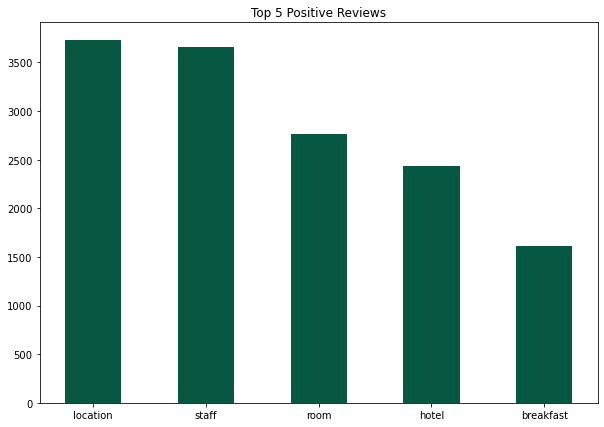

In [15]:
# Creating a bar plot for the top five positive features

labels, ys = zip(*top_five_positive_reviews)
xs = np.arange(len(labels))
width = 0.5

fig = plt.figure(figsize=(10, 7))
ax = fig.gca()
ax.bar(xs, ys, width, align= 'center', color = '#065842')

ax.set_xticks(xs)
ax.set_xticklabels(labels)

plt.title('Top 5 Positive Reviews', fontsize = 12)
plt.show()

#### Negative Reviewa

In [16]:
negative_reviews = dict()

for index, row in df_sample.iterrows():
    negative = row['Negative_Comments']
    doc = nlp(negative)
    for token in doc:
        if token not in stop_words:
            if token.pos_ == 'NOUN':
                if token.text in negative_reviews:
                    negative_reviews[token.text] +=1
                else:
                    negative_reviews[token.text] = 1

negative_sorted = sorted(negative_reviews.items(), key=lambda x: x[1], reverse=True)
negative_sorted

[('room', 3412),
 ('hotel', 1495),
 ('breakfast', 1153),
 ('staff', 792),
 ('rooms', 698),
 ('bed', 601),
 ('bathroom', 505),
 ('bit', 504),
 ('night', 483),
 ('t', 406),
 ('service', 380),
 ('bar', 343),
 ('time', 333),
 ('shower', 328),
 ('reception', 320),
 ('day', 313),
 ('price', 298),
 ('floor', 273),
 ('door', 253),
 ('coffee', 249),
 ('air', 241),
 ('noise', 238),
 ('water', 237),
 ('wifi', 235),
 ('restaurant', 229),
 ('location', 223),
 ('food', 217),
 ('people', 213),
 ('wasn', 207),
 ('area', 203),
 ('parking', 196),
 ('morning', 196),
 ('tea', 192),
 ('stay', 184),
 ('check', 181),
 ('window', 178),
 ('view', 177),
 ('money', 175),
 ('pool', 167),
 ('facilities', 166),
 ('star', 163),
 ('tv', 162),
 ('beds', 154),
 ('problem', 139),
 ('times', 131),
 ('guests', 131),
 ('work', 130),
 ('size', 130),
 ('toilet', 129),
 ('space', 128),
 ('bath', 122),
 ('booking', 121),
 ('hotels', 115),
 ('card', 114),
 ('days', 113),
 ('thing', 113),
 ('way', 112),
 ('city', 112),
 ('lot', 

In [17]:
# Filter the dictionary to get the top 5 features

top_five_negtive_reviews = negative_sorted[0:5]
top_five_negtive_reviews

[('room', 3412),
 ('hotel', 1495),
 ('breakfast', 1153),
 ('staff', 792),
 ('rooms', 698)]

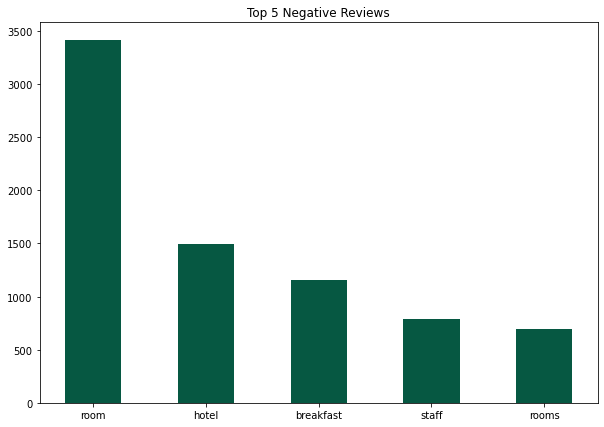

In [18]:
# Creating a bar plot for the top five positive features

labels, ys = zip(*top_five_negtive_reviews)
xs = np.arange(len(labels))
width = 0.5

fig = plt.figure(figsize=(10, 7))
ax = fig.gca()
ax.bar(xs, ys, width, align= 'center', color = '#065842')

ax.set_xticks(xs)
ax.set_xticklabels(labels)

plt.title('Top 5 Negative Reviews', fontsize = 12)
plt.show()

## 2. What are the top five features that customers prefer most if they are a group traveler vs traveling with a group vs on a business trip vs a leisure trip vs traveling as a couple vs a family with young children. You will find these categories in the "Tags" column. There are a few more tags that we don't need. (2 points).


In [19]:
# Subset by high reviews
# This is to ensure we get the people that rated these hotels highly and that they actually liked something about the hotel
# Since 25% of the data on Reviewer Scorer falls at 7.5, we will use that

df_high_review_score = df[df['Reviewer_Score'] > 7.5]
len(df_high_review_score)

368743

In [20]:
# Convert the positive and negative comments to a string datatype for processing

df_high_review_score['Positive_Comments'] = df_high_review_score['Positive_Comments'].astype(str)
df_high_review_score['Negative_Comments'] = df_high_review_score['Negative_Comments'].astype(str)

C:\Users\Scott\AppData\Local\Temp/ipykernel_9732/3709594545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_review_score['Positive_Comments'] = df_high_review_score['Positive_Comments'].astype(str)
C:\Users\Scott\AppData\Local\Temp/ipykernel_9732/3709594545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_review_score['Negative_Comments'] = df_high_review_score['Negative_Comments'].astype(str)


In [21]:
# Creating a dataframe based on the tag value

solo_tag = df_high_review_score[df_high_review_score['Tags'].str.contains('solo')]
group_tag = df_high_review_score[df_high_review_score['Tags'].str.contains('group')]
business_tag = df_high_review_score[df_high_review_score['Tags'].str.contains('business')]
leisure_tag = df_high_review_score[df_high_review_score['Tags'].str.contains('leisure')]
couple_tag = df_high_review_score[df_high_review_score['Tags'].str.contains('couple')]
children_tag = df_high_review_score[df_high_review_score['Tags'].str.contains('children')]


In [22]:
print('Solo: ', solo_tag.shape)
print('Group: ', group_tag.shape)
print('Business: ', business_tag.shape)
print('Leisure: ', leisure_tag.shape)
print('Couple: ', couple_tag.shape)
print('Children: ', children_tag.shape)

Solo:  (70932, 12)
Group:  (47505, 12)
Business:  (51808, 12)
Leisure:  (307705, 12)
Couple:  (187007, 12)
Children:  (61886, 12)


In [23]:
# Taking a sample of each dataframe 

solo_sample = solo_tag.sample(n=10000)
group_sample = group_tag.sample(n=10000)
business_sample = business_tag.sample(n=10000)
leisure_sample = leisure_tag.sample(n=10000)
couple_sample = couple_tag.sample(n=10000)
children_sample = children_tag.sample(n=10000)

### Solo

In [24]:
# For loop to extract features based on positive reviews

solo_feature = dict()                                   # Create a dictionary

for index, row in solo_sample.iterrows():               # Iterate through each row for the positive comments column
    doc = nlp(row["Positive_Comments"])
    for token in doc:                                   # Iterate through each word within that row
        if token not in stop_words:                     # Remove stop words
            if token.pos_ == 'NOUN':                    # Get the nouns from the sentences
                if token.text in solo_feature:          # Count the number of times the noun appears
                    solo_feature[token.text] +=1
                else:
                    solo_feature[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
solo_sorted = sorted(solo_feature.items(), key = lambda x: x[1], reverse = True)
top_five_solo = solo_sorted[0:5]
top_five_solo

[('staff', 4034),
 ('location', 3533),
 ('room', 3234),
 ('hotel', 2472),
 ('breakfast', 1660)]

### Group

In [25]:
# For loop to extract features based on positive reviews

group_feature = dict()                                   # Create a dictionary

for index, row in group_sample.iterrows():               # Iterate through each row for the positive comments column
    doc = nlp(row["Positive_Comments"])
    for token in doc:                                    # Iterate through each word within that row
        if token not in stop_words:                      # Remove stop words
            if token.pos_ == 'NOUN':                     # Get the nouns from the sentences
                if token.text in group_feature:          # Count the number of times the noun appears
                    group_feature[token.text] +=1
                else:
                    group_feature[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
group_sorted = sorted(group_feature.items(), key = lambda x: x[1], reverse = True)
top_five_group = group_sorted[0:5]
top_five_group

[('staff', 4435),
 ('location', 3691),
 ('hotel', 2891),
 ('room', 2476),
 ('breakfast', 1724)]

### Business

In [26]:
# For loop to extract features based on positive reviews

business_feature = dict()                                   # Create a dictionary

for index, row in business_sample.iterrows():               # Iterate through each row for the positive comments column
    doc = nlp(row["Positive_Comments"])
    for token in doc:                                       # Iterate through each word within that row
        if token not in stop_words:                         # Remove stop words
            if token.pos_ == 'NOUN':                        # Get the nouns from the sentences
                if token.text in business_feature:          # Count the number of times the noun appears
                    business_feature[token.text] +=1
                else:
                    business_feature[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
business_sorted = sorted(business_feature.items(), key = lambda x: x[1], reverse = True)
top_five_business = business_sorted[0:5]
top_five_business

[('staff', 3709),
 ('location', 3384),
 ('room', 2811),
 ('hotel', 2266),
 ('breakfast', 1677)]

### Leisure

In [27]:
# For loop to extract features based on positive reviews

leisure_feature = dict()                                   # Create a dictionary

for index, row in leisure_sample.iterrows():               # Iterate through each row for the positive comments column
    doc = nlp(row["Positive_Comments"])
    for token in doc:                                      # Iterate through each word within that row
        if token not in stop_words:                        # Remove stop words
            if token.pos_ == 'NOUN':                       # Get the nouns from the sentences
                if token.text in leisure_feature:          # Count the number of times the noun appears
                    leisure_feature[token.text] +=1
                else:
                    leisure_feature[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
leisure_sorted = sorted(leisure_feature.items(), key = lambda x: x[1], reverse = True)
top_five_leisure = leisure_sorted[0:5]
top_five_leisure

[('staff', 4608),
 ('location', 3808),
 ('room', 3150),
 ('hotel', 2916),
 ('breakfast', 1852)]

### Couple

In [28]:
# For loop to extract features based on positive reviews

couple_feature = dict()                                   # Create a dictionary

for index, row in couple_sample.iterrows():               # Iterate through each row for the positive comments column
    doc = nlp(row["Positive_Comments"])
    for token in doc:                                     # Iterate through each word within that row
        if token not in stop_words:                       # Remove stop words
            if token.pos_ == 'NOUN':                      # Get the nouns from the sentences
                if token.text in couple_feature:          # Count the number of times the noun appears
                    couple_feature[token.text] +=1
                else:
                    couple_feature[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
couple_sorted = sorted(couple_feature.items(), key = lambda x: x[1], reverse = True)
top_five_couple = couple_sorted[0:5]
top_five_couple

[('staff', 4654),
 ('location', 3673),
 ('room', 3254),
 ('hotel', 2989),
 ('breakfast', 1783)]

### Children

In [29]:
# For loop to extract features based on positive reviews

children_feature = dict()                                   # Create a dictionary

for index, row in children_sample.iterrows():               # Iterate through each row for the positive comments column
    doc = nlp(row["Positive_Comments"])
    for token in doc:                                       # Iterate through each word within that row
        if token not in stop_words:                         # Remove stop words
            if token.pos_ == 'NOUN':                        # Get the nouns from the sentences
                if token.text in children_feature:          # Count the number of times the noun appears
                    children_feature[token.text] +=1
                else:
                    children_feature[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
children_sorted = sorted(children_feature.items(), key = lambda x: x[1], reverse = True)
top_five_children = children_sorted[0:5]
top_five_children

[('staff', 4537),
 ('location', 3991),
 ('hotel', 2833),
 ('room', 2660),
 ('breakfast', 2010)]

#### Graph Dashboard

Text(0.5, 1.0, 'Children')

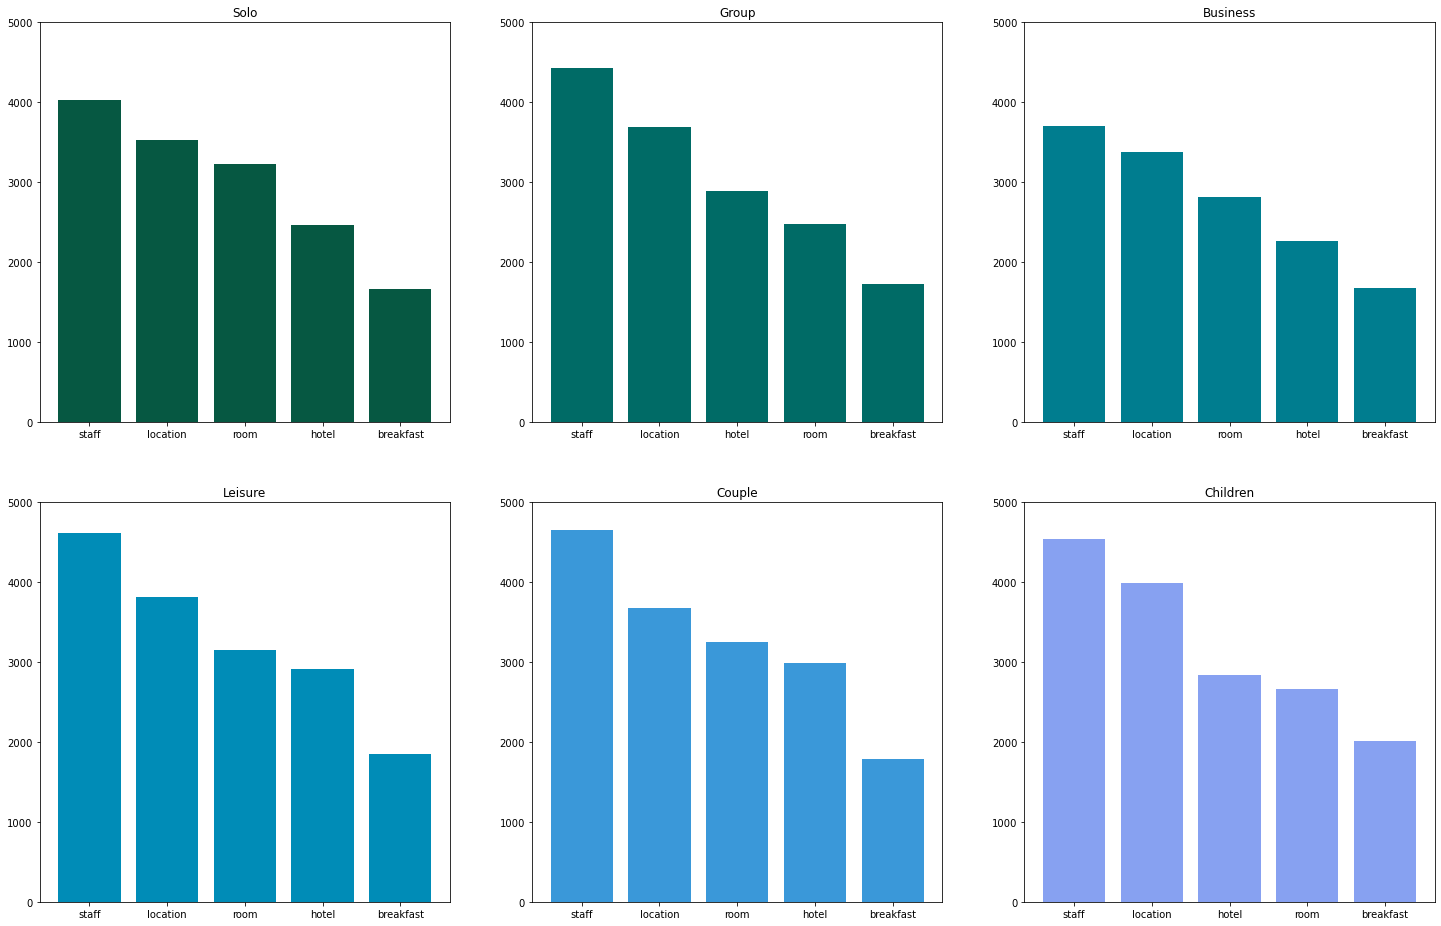

In [30]:
# Creating a bar plot for the top five positive features
plt.figure(figsize=(25, 25))


plt.subplot(3,3,1)
labels1, keys1 = zip(*top_five_solo)
plt.bar(range(len(top_five_solo)), keys1, tick_label = labels1, color = '#065842')
plt.ylim(0,5000)
plt.title('Solo')


plt.subplot(3,3,2)
labels2, keys2 = zip(*top_five_group)
plt.bar(range(len(top_five_group)), keys2, tick_label = labels2, color = '#006B66')
plt.ylim(0,5000)
plt.title('Group')

plt.subplot(3,3,3)
labels3, keys3 = zip(*top_five_business)
plt.bar(range(len(top_five_business)), keys3, tick_label = labels3, color = '#007D8F')
plt.ylim(0,5000)
plt.title('Business')

plt.subplot(3,3,4)
labels4, keys4 = zip(*top_five_leisure)
plt.bar(range(len(top_five_leisure)), keys4, tick_label = labels4, color = '#008CB7')
plt.ylim(0,5000)
plt.title('Leisure')

plt.subplot(3,3,5)
labels5, keys5 = zip(*top_five_couple)
plt.bar(range(len(top_five_couple)), keys5, tick_label = labels5, color = '#3A98D9')
plt.ylim(0,5000)
plt.title('Couple')

plt.subplot(3,3,6)
labels6, keys6 = zip(*top_five_children)
plt.bar(range(len(top_five_children)), keys6, tick_label = labels6, color = '#87A1F1')
plt.ylim(0,5000)
plt.title('Children')

## 3. What are the top five features customers like most and top five features they complain about most about hotels in United Kingdom, France, Italy, and Spain? Country information is available inside Hotel_Address.

In [31]:
# Subset the dataframe based on low scoring reviews

df_low_review_score = df[df['Reviewer_Score'] < 5]
len(df_low_review_score)

22281

In [32]:
# Creating a dataframe based on the hotel address value

# Positives
uk_location_positive = df_high_review_score[df_high_review_score['Hotel_Address'].str.contains('United Kingdom')]
fr_location_positive = df_high_review_score[df_high_review_score['Hotel_Address'].str.contains('France')]
it_location_positive = df_high_review_score[df_high_review_score['Hotel_Address'].str.contains('Italy')]
sp_location_positive = df_high_review_score[df_high_review_score['Hotel_Address'].str.contains('Spain')]

# Negatives
uk_location_negative = df_low_review_score[df_low_review_score['Hotel_Address'].str.contains('United Kingdom')]
fr_location_negative = df_low_review_score[df_low_review_score['Hotel_Address'].str.contains('France')]
it_location_negative = df_low_review_score[df_low_review_score['Hotel_Address'].str.contains('Italy')]
sp_location_negative = df_low_review_score[df_low_review_score['Hotel_Address'].str.contains('Spain')]

In [33]:
# Positives
print('Positives')
print('United Kingdom: ', uk_location_positive.shape)
print('France: ', fr_location_positive.shape)
print('Italy: ', it_location_positive.shape)
print('Spain: ', sp_location_positive.shape)

print('')

# Negatives
print('Negatives')
print('United Kingdom: ', uk_location_negative.shape)
print('France: ', fr_location_negative.shape)
print('Italy: ', it_location_negative.shape)
print('Spain: ', sp_location_negative.shape)


Positives
United Kingdom:  (181556, 12)
France:  (43600, 12)
Italy:  (26456, 12)
Spain:  (45488, 12)

Negatives
United Kingdom:  (12190, 12)
France:  (2812, 12)
Italy:  (1713, 12)
Spain:  (2055, 12)


In [34]:
# Taking a sample of each dataframe 

# Positives
uk_sample_positive = uk_location_positive.sample(n=10000)
fr_sample_positive = fr_location_positive.sample(n=10000)
it_sample_positive = it_location_positive.sample(n=10000)
sp_sample_positive = sp_location_positive.sample(n=10000)

# Negatives
uk_sample_negative = uk_location_negative.sample(n=1000)
fr_sample_negative = fr_location_negative.sample(n=1000)
it_sample_negative = it_location_negative.sample(n=1000)
sp_sample_negative = sp_location_negative.sample(n=1000)

#### United Kingdom

In [35]:
# For loop to extract features based on positive reviews

uk_positive = dict()                                     # Create a dictionary

for index, row in uk_sample_positive.iterrows():         # Iterate through each row for the positive comments column
    doc = nlp(row["Positive_Comments"])
    for token in doc:                                    # Iterate through each word within that row
        if token not in stop_words:                      # Remove stop words
            if token.pos_ == 'NOUN':                     # Get the nouns from the sentences
                if token.text in uk_positive:            # Count the number of times the noun appears
                    uk_positive[token.text] +=1
                else:
                    uk_positive[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
uk_positive_sorted = sorted(uk_positive.items(), key = lambda x: x[1], reverse = True)
top_five_uk_positive_sorted = uk_positive_sorted[0:5]
top_five_uk_positive_sorted

[('staff', 4417),
 ('location', 3350),
 ('room', 3194),
 ('hotel', 2393),
 ('breakfast', 1499)]

In [36]:
# For loop to extract features based on negative reviews

uk_negative = dict()                                     # Create a dictionary

for index, row in uk_sample_negative.iterrows():         # Iterate through each row for the negative comments column
    doc = nlp(row["Negative_Comments"])
    for token in doc:                                    # Iterate through each word within that row
        if token not in stop_words:                      # Remove stop words
            if token.pos_ == 'NOUN':                     # Get the nouns from the sentences
                if token.text in uk_negative:            # Count the number of times the noun appears
                    uk_negative[token.text] +=1
                else:
                    uk_negative[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
uk_negative_sorted = sorted(uk_negative.items(), key = lambda x: x[1], reverse = True)
top_five_uk_negative_sorted = uk_negative_sorted[0:5]
top_five_uk_negative_sorted

[('room', 1003), ('hotel', 420), ('staff', 278), ('rooms', 218), ('bed', 177)]

#### France

In [37]:
# For loop to extract features based on positive reviews

fr_positive = dict()                                     # Create a dictionary

for index, row in fr_sample_positive.iterrows():         # Iterate through each row for the positive comments column
    doc = nlp(row["Positive_Comments"])
    for token in doc:                                    # Iterate through each word within that row
        if token not in stop_words:                      # Remove stop words
            if token.pos_ == 'NOUN':                     # Get the nouns from the sentences
                if token.text in fr_positive:            # Count the number of times the noun appears
                    fr_positive[token.text] +=1
                else:
                    fr_positive[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
fr_positive_sorted = sorted(fr_positive.items(), key = lambda x: x[1], reverse = True)
top_five_fr_positive_sorted = fr_positive_sorted[0:5]
top_five_fr_positive_sorted

[('staff', 4826),
 ('location', 4612),
 ('hotel', 3174),
 ('room', 3151),
 ('breakfast', 1415)]

In [38]:
# For loop to extract features based on negative reviews

fr_negative = dict()                                     # Create a dictionary

for index, row in fr_sample_negative.iterrows():         # Iterate through each row for the negative comments column
    doc = nlp(row["Negative_Comments"])
    for token in doc:                                    # Iterate through each word within that row
        if token not in stop_words:                      # Remove stop words
            if token.pos_ == 'NOUN':                     # Get the nouns from the sentences
                if token.text in fr_negative:            # Count the number of times the noun appears
                    fr_negative[token.text] +=1
                else:
                    fr_negative[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
fr_negative_sorted = sorted(fr_negative.items(), key = lambda x: x[1], reverse = True)
top_five_fr_negative_sorted = fr_negative_sorted[0:5]
top_five_fr_negative_sorted

[('room', 811),
 ('hotel', 574),
 ('staff', 290),
 ('rooms', 216),
 ('breakfast', 127)]

#### Italy

In [39]:
# For loop to extract features based on positive reviews

it_positive = dict()                                     # Create a dictionary

for index, row in it_sample_positive.iterrows():         # Iterate through each row for the positive comments column
    doc = nlp(row["Positive_Comments"])
    for token in doc:                                    # Iterate through each word within that row
        if token not in stop_words:                      # Remove stop words
            if token.pos_ == 'NOUN':                     # Get the nouns itom the sentences
                if token.text in it_positive:            # Count the number of times the noun appears
                    it_positive[token.text] +=1
                else:
                    it_positive[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
it_positive_sorted = sorted(it_positive.items(), key = lambda x: x[1], reverse = True)
top_five_it_positive_sorted = it_positive_sorted[0:5]
top_five_it_positive_sorted

[('staff', 3966),
 ('location', 3721),
 ('breakfast', 3246),
 ('hotel', 3218),
 ('room', 2995)]

In [40]:
# For loop to extract features based on negative reviews

it_negative = dict()                                     # Create a dictionary

for index, row in it_sample_negative.iterrows():         # Iterate through each row for the negative comments column
    doc = nlp(row["Negative_Comments"])
    for token in doc:                                    # Iterate through each word within that row
        if token not in stop_words:                      # Remove stop words
            if token.pos_ == 'NOUN':                     # Get the nouns itom the sentences
                if token.text in it_negative:            # Count the number of times the noun appears
                    it_negative[token.text] +=1
                else:
                    it_negative[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
it_negative_sorted = sorted(it_negative.items(), key = lambda x: x[1], reverse = True)
top_five_it_negative_sorted = it_negative_sorted[0:5]
top_five_it_negative_sorted

[('room', 789),
 ('hotel', 701),
 ('staff', 312),
 ('breakfast', 237),
 ('rooms', 186)]

#### Spain

In [41]:
# For loop to extract features based on positive reviews

sp_positive = dict()                                     # Create a dictionary

for index, row in sp_sample_positive.iterrows():         # Iterate through each row for the positive comments column
    doc = nlp(row["Positive_Comments"])
    for token in doc:                                    # Iterate through each word within that row
        if token not in stop_words:                      # Remove stop words
            if token.pos_ == 'NOUN':                     # Get the nouns spom the sentences
                if token.text in sp_positive:            # Count the number of times the noun appears
                    sp_positive[token.text] +=1
                else:
                    sp_positive[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
sp_positive_sorted = sorted(sp_positive.items(), key = lambda x: x[1], reverse = True)
top_five_sp_positive_sorted = sp_positive_sorted[0:5]
top_five_sp_positive_sorted

[('staff', 4702),
 ('location', 4290),
 ('hotel', 3185),
 ('room', 2729),
 ('breakfast', 1697)]

In [42]:
# For loop to extract features based on negative reviews

sp_negative = dict()                                     # Create a dictionary

for index, row in sp_sample_negative.iterrows():         # Iterate through each row for the negative comments column
    doc = nlp(row["Negative_Comments"])
    for token in doc:                                    # Iterate through each word within that row
        if token not in stop_words:                      # Remove stop words
            if token.pos_ == 'NOUN':                     # Get the nouns spom the sentences
                if token.text in sp_negative:            # Count the number of times the noun appears
                    sp_negative[token.text] +=1
                else:
                    sp_negative[token.text] = 1

# Sort the dictionary where the highest number of features are on the top
sp_negative_sorted = sorted(sp_negative.items(), key = lambda x: x[1], reverse = True)
top_five_sp_negative_sorted = sp_negative_sorted[0:5]
top_five_sp_negative_sorted

[('room', 878), ('hotel', 610), ('staff', 325), ('rooms', 198), ('bed', 163)]

#### Graphs

Text(0.5, 1.0, 'Spain')

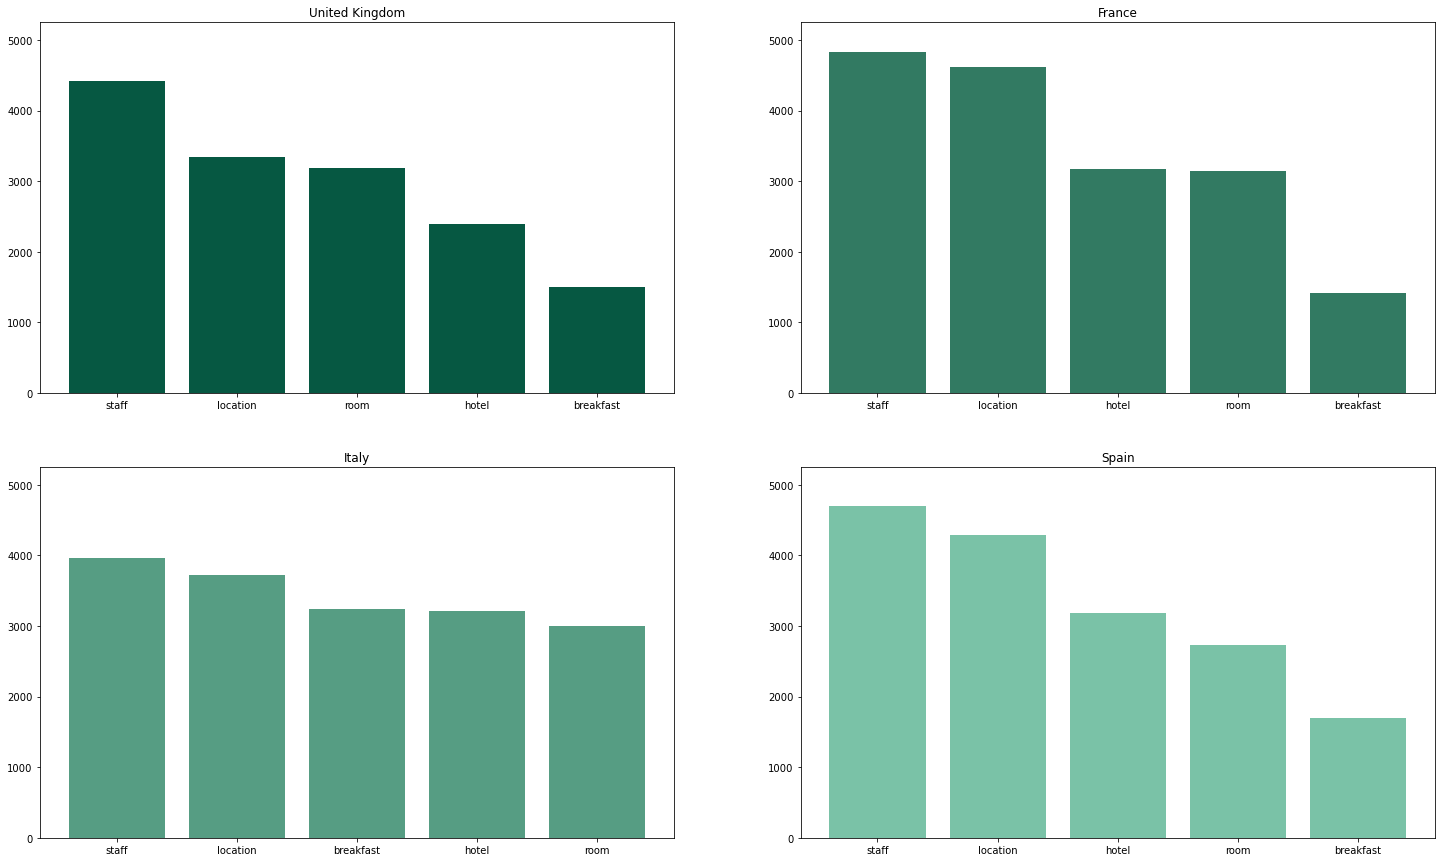

In [43]:
# Creating a bar plot for the top five positive features
plt.figure(figsize=(25, 15))


plt.subplot(2,2,1)
labels1, keys1 = zip(*top_five_uk_positive_sorted)
plt.bar(range(len(top_five_uk_positive_sorted)), keys1, tick_label = labels1, color = '#065842')
plt.ylim(0,5250)
plt.title('United Kingdom')


plt.subplot(2,2,2)
labels2, keys2 = zip(*top_five_fr_positive_sorted)
plt.bar(range(len(top_five_fr_positive_sorted)), keys2, tick_label = labels2, color = '#327A62')
plt.ylim(0,5250)
plt.title('France')

plt.subplot(2,2,3)
labels3, keys3 = zip(*top_five_it_positive_sorted)
plt.bar(range(len(top_five_it_positive_sorted)), keys3, tick_label = labels3, color = '#569D83')
plt.ylim(0,5250)
plt.title('Italy')

plt.subplot(2,2,4)
labels4, keys4 = zip(*top_five_sp_positive_sorted)
plt.bar(range(len(top_five_sp_positive_sorted)), keys4, tick_label = labels4, color = '#7AC2A7')
plt.ylim(0,5250)
plt.title('Spain')

Text(0.5, 1.0, 'Spain')

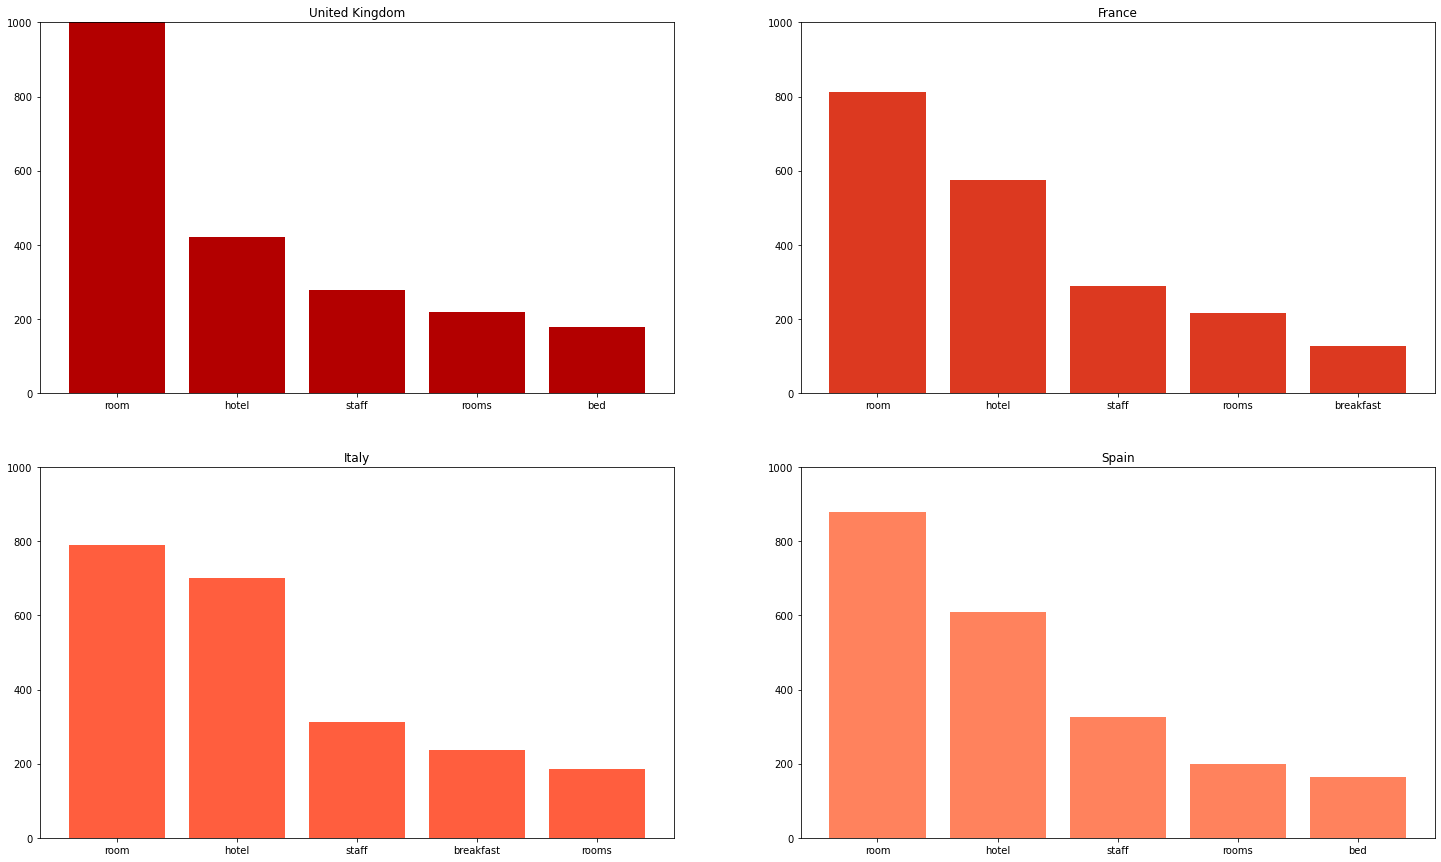

In [44]:
# Creating a bar plot for the top five negative features
plt.figure(figsize=(25, 15))


plt.subplot(2,2,1)
labels1, keys1 = zip(*top_five_uk_negative_sorted)
plt.bar(range(len(top_five_uk_negative_sorted)), keys1, tick_label = labels1, color = '#B30000')
plt.ylim(0,1000)
plt.title('United Kingdom')


plt.subplot(2,2,2)
labels2, keys2 = zip(*top_five_fr_negative_sorted)
plt.bar(range(len(top_five_fr_negative_sorted)), keys2, tick_label = labels2, color = '#DC3920')
plt.ylim(0,1000)
plt.title('France')

plt.subplot(2,2,3)
labels3, keys3 = zip(*top_five_it_negative_sorted)
plt.bar(range(len(top_five_it_negative_sorted)), keys3, tick_label = labels3, color = '#FF5E3E')
plt.ylim(0,1000)
plt.title('Italy')

plt.subplot(2,2,4)
labels4, keys4 = zip(*top_five_sp_negative_sorted)
plt.bar(range(len(top_five_sp_negative_sorted)), keys4, tick_label = labels4, color = '#FF825D')
plt.ylim(0,1000)
plt.title('Spain')

## 4. Create a dashboard with the following plots; (1) "Top Five Hotels Overall" with consistently high ratings, (2) Bottom Five Hotels Overall" with consistently low ratings, (3) Five Most Improved Hotels" with the highest improvement in average ratings from 2015 to 2017, showing their average ratings for each of the three years.

In [46]:
# Create a copy of the dataframe as we will be making changes to it

df_improvement = df.copy()

df_improvement.dtypes

Hotel_Name                          object
Hotel_Address                       object
Review_Count                         int64
Non_Review_Scoring_Count             int64
Average_Hotel_Score                float64
Review_Date                 datetime64[ns]
Reviewer_Nationality                object
Positive_Comments                   object
Negative_Comments                   object
Total_Reviewer_Reviews               int64
Reviewer_Score                     float64
Tags                                object
dtype: object

In [51]:
# Creating a new column by extracting the year from the review date

df_improvement['Year'] = pd.DatetimeIndex(df_improvement['Review_Date']).year
df_improvement.head()

,Hotel_Name,Hotel_Address,Review_Count,Non_Review_Scoring_Count,Average_Hotel_Score,Review_Date,Reviewer_Nationality,Positive_Comments,Negative_Comments,Total_Reviewer_Reviews,Reviewer_Score,Tags,Year
0,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-08-03,Russia,only the park outside of the hotel was beauti...,i am so angry that i made this post available...,7,2.9,"[' leisure trip ', ' couple ', ' duplex double...",2017
1,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-08-03,Ireland,no real complaints the hotel was great great ...,no negative,7,7.5,"[' leisure trip ', ' couple ', ' duplex double...",2017
2,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-31,Australia,location was good and staff were ok it is cut...,rooms are nice but for elderly a bit difficul...,9,7.1,"[' leisure trip ', ' family with young childre...",2017
3,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-31,United Kingdom,great location in nice surroundings the bar a...,my room was dirty and i was afraid to walk ba...,1,3.8,"[' leisure trip ', ' solo traveler ', ' duplex...",2017
4,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-24,New Zealand,amazing location and building romantic setting,you when i booked with your company on line y...,3,6.7,"[' leisure trip ', ' couple ', ' suite ', ' st...",2017


In [52]:
# Grouping by the hotel and the year to get the average review score

df_score_by_year = pd.DataFrame(df_improvement.groupby(['Hotel_Name', 'Year'])['Reviewer_Score'].mean().reset_index())
df_score_by_year.head()

,Hotel_Name,Year,Reviewer_Score
0,41,2015,9.743333
1,41,2016,9.652083
2,41,2017,9.788000
3,11 Cadogan Gardens,2015,8.016000
4,11 Cadogan Gardens,2016,8.954321


In [53]:
# Pivoting the dataframe so each year is its own column and the hotel name is one row

df_score_by_year = pd.DataFrame(df_score_by_year.pivot(index = 'Hotel_Name', columns = 'Year', values='Reviewer_Score').reset_index())
df_score_by_year = df_score_by_year.rename_axis(None, axis = 1)
df_score_by_year.head()

,Hotel_Name,2015,2016,2017
0,41,9.743333,9.652083,9.788000
1,11 Cadogan Gardens,8.016000,8.954321,9.069811
2,1K Hotel,7.831429,7.763235,8.033333
3,25hours Hotel beim MuseumsQuartier,8.806280,8.993976,9.204000
4,45 Park Lane Dorchester Collection,9.080000,9.653846,9.800000


#### Consistently high rating hotels

In [76]:
# Getting the mean of the review score. We will need this late
average_review_score = df_improvement['Reviewer_Score'].mean()
average_review_score

8.395076569886239

In [88]:
# Subset the dataframe where each year the hotel's ratings are higher than the overall average ratings across all hotels in the data
consistently_high_ratings = df_score_by_year[(df_score_by_year[2015] > average_review_score) & (df_score_by_year[2016] > average_review_score) & (df_score_by_year[2017] > average_review_score)]

# Calculate the average ratings for a hotel for the three years and append the values to a new column
consistently_high_ratings['all_year_avg_high_reviews'] = (consistently_high_ratings[2015] + consistently_high_ratings[2016] + consistently_high_ratings[2017])/3

# # Sort the dataset in descending order to get the highest average hotel rating
consistently_high_ratings = consistently_high_ratings.sort_values(by = 'all_year_avg_high_reviews', ascending= False)

# Create a short dataframe for the top 5 hotels with the best reviews
consistently_high_ratings = consistently_high_ratings[0:5]

C:\Users\Scott\AppData\Local\Temp/ipykernel_9732/3722183428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consistently_high_ratings['all_year_avg_high_reviews'] = (consistently_high_ratings[2015] + consistently_high_ratings[2016] + consistently_high_ratings[2017])/3


#### These are the top 5 consistently high rating hotels

In [89]:

consistently_high_ratings

,Hotel_Name,2015,2016,2017,all_year_avg_high_reviews
472,H tel de La Tamise Esprit de France,9.822222,9.626316,9.771429,9.739989
0,41,9.743333,9.652083,9.788000,9.727806
598,Hotel Casa Camper,9.589231,9.752991,9.756303,9.699508
732,Hotel Plaza Athenee Paris,9.781818,9.270588,9.900000,9.650802
771,Hotel The Serras,9.622727,9.641228,9.587273,9.617076


#### Consistently low rating hotels

In [92]:
# Subet the dataframe where each year the hotel's ratings are lower than 7
consistently_low_ratings = df_score_by_year[(df_score_by_year[2015] < 7) & (df_score_by_year[2016] < 7) & (df_score_by_year[2017] < 7)]

# Calculate the average ratings for a hotel for the three years and append the values to a new column
consistently_low_ratings['all_year_avg_low_reviews'] = (consistently_low_ratings[2015] + consistently_low_ratings[2016] + consistently_low_ratings[2017])/3

# # Sort the dataset in descending order to get the lowest average hotel rating
consistently_low_ratings = consistently_low_ratings.sort_values(by = 'all_year_avg_low_reviews', ascending= True)

# Create a short dataframe for the top 5 hotels with the best reviews
consistently_low_ratings = consistently_low_ratings[0:5]

C:\Users\Scott\AppData\Local\Temp/ipykernel_9732/124943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consistently_low_ratings['all_year_avg_low_reviews'] = (consistently_low_ratings[2015] + consistently_low_ratings[2016] + consistently_low_ratings[2017])/3


#### These are the top 5 consistently low ratings hotels

In [93]:
consistently_low_ratings

,Hotel_Name,2015,2016,2017,all_year_avg_low_reviews
678,Hotel Liberty,5.546667,5.336364,4.725000,5.202677
852,Kube Hotel Ice Bar,5.580000,5.300000,6.816667,5.898889
1233,Savoy Hotel Amsterdam,6.445098,5.983333,5.762821,6.063751
141,Best Western Maitrise Hotel Edgware Road,6.426471,6.533577,5.895918,6.285322
822,Idea Hotel Milano San Siro,5.766667,6.634361,6.548291,6.316439


#### Most improved hotels over the years

In [94]:
# Finding the difference in average review score between 2017 and 2015 to see how much the hotels have imprpved by
df_score_by_year['review_diff'] = df_score_by_year[2017] - df_score_by_year[2015]

# Sorting the dataframe in descending order so that the hotels with the most improvements are on hte top of the dataframe
df_score_by_year = df_score_by_year.sort_values(by = 'review_diff', ascending= False)

# Creating a small dataframe to get a list of the top 5 most improved hotels
most_improved_hotels = df_score_by_year[:5]

##### These are the top 5 hotels with the most improvements over the years

In [96]:
most_improved_hotels

,Hotel_Name,2015,2016,2017,review_diff
883,Le Lavoisier,2.500000,8.150000,10.000000,7.500000
987,Mercure Paris Bastille Saint Antoine,5.000000,7.478571,7.566667,2.566667
853,L Edmond H tel,6.450000,8.171429,8.572727,2.122727
1012,MiHotel,7.125000,8.810000,9.075000,1.950000
1456,Villa Lut ce Port Royal,5.594444,6.741667,7.520000,1.925556


#### Plotting a line graph to visualize the improvements for the hotels

In [97]:
# Some data manipulation needs to be done in order to plot a line graph

# Transpose the dataframe
most_improved_hotels_transposed = most_improved_hotels.transpose().rename_axis(None, axis = 1).reset_index()

# Promote first row as headers
most_improved_hotels_transposed.columns = most_improved_hotels_transposed.iloc[0]

# Drop the first row as this is used for headers
most_improved_hotels_transposed = most_improved_hotels_transposed.drop(most_improved_hotels_transposed.index[0])

# Drop the fourth row as this will not be needed in the plot
most_improved_hotels_transposed = most_improved_hotels_transposed.drop(most_improved_hotels_transposed.index[3])

# Rename the column header
most_improved_hotels_transposed = most_improved_hotels_transposed.rename({'Hotel_Name' : 'Year'}, axis = 1)

# Change column data type to string
most_improved_hotels_transposed['Year'] = most_improved_hotels_transposed['Year'].astype(str)

# View the dataframe
most_improved_hotels_transposed

,Year,Le Lavoisier,Mercure Paris Bastille Saint Antoine,L Edmond H tel,MiHotel,Villa Lut ce Port Royal
1,2015,2.5,5.0,6.45,7.125,5.594444
2,2016,8.15,7.478571,8.171429,8.81,6.741667
3,2017,10.0,7.566667,8.572727,9.075,7.52


##### Dashboard

Text(0.5, 1.0, 'Hotel Ratings Improvements by Year')

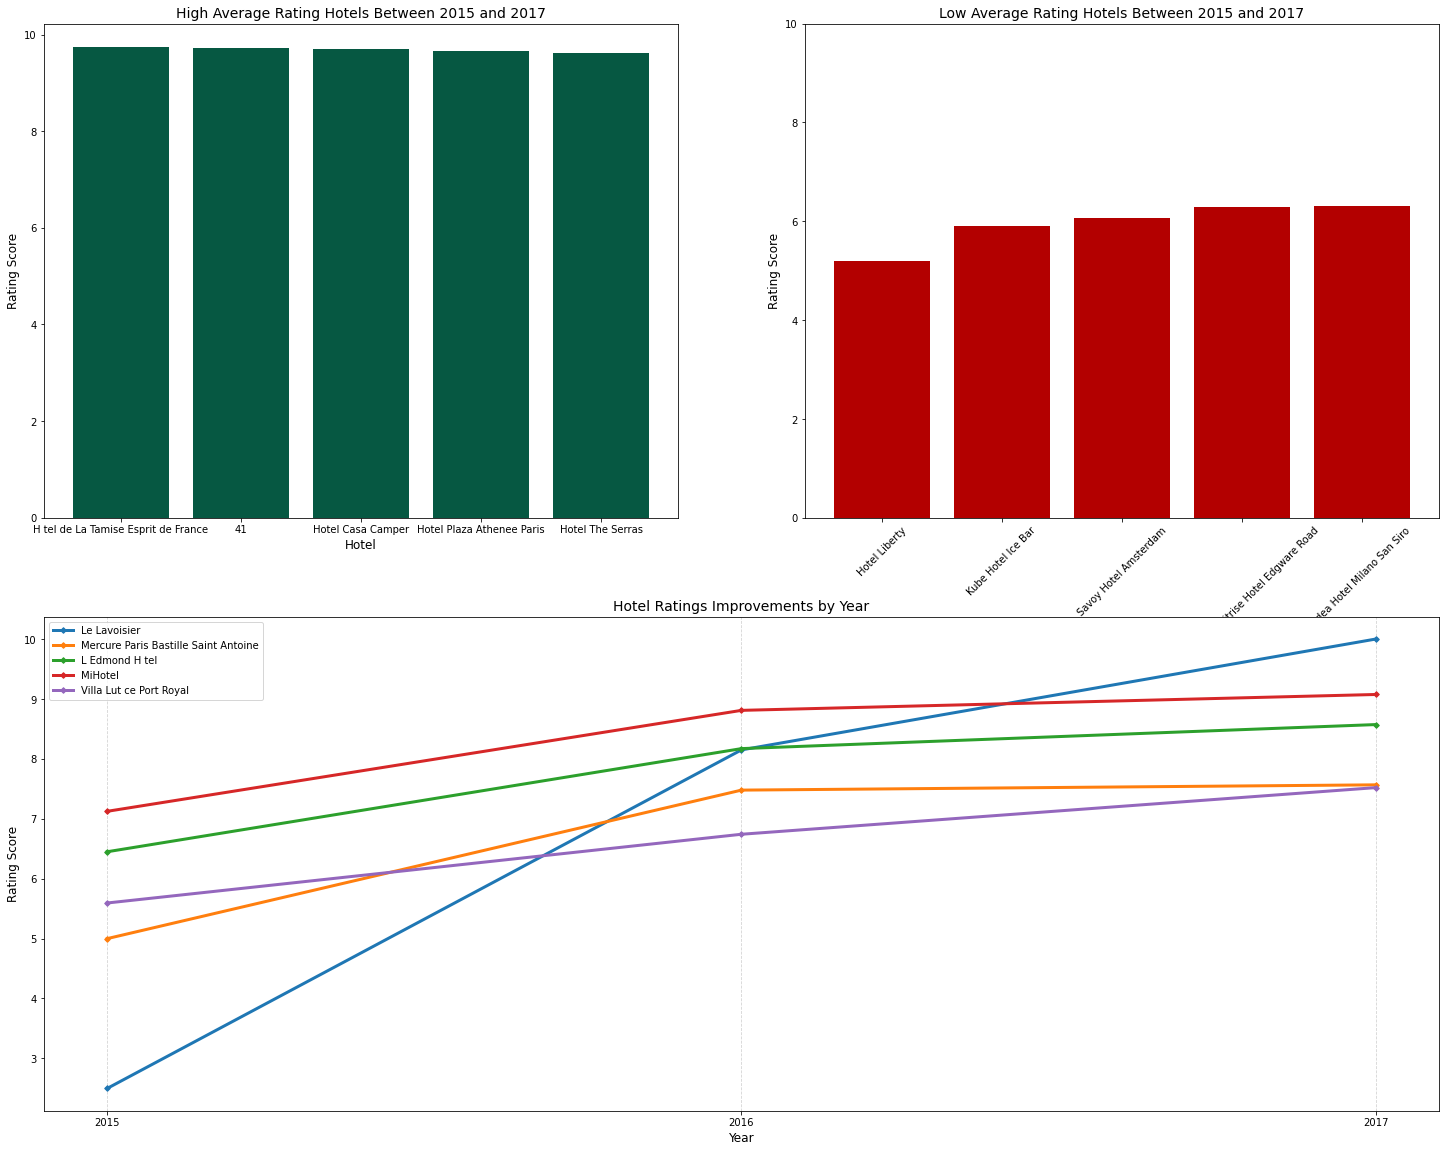

In [145]:
# Creating a bar plot for the top five positive features
plt.figure(figsize=(25, 20))
# plt.tight_layout(pad=15.0)

# High Ratings
plt.subplot(2,2,1)
labels1 = consistently_high_ratings['Hotel_Name'].astype(str)
values1 = consistently_high_ratings['all_year_avg_high_reviews']
plt.bar(labels1, values1, color = '#065842')
plt.xlabel('Hotel', fontsize = 12)
# plt.xticks(rotation = 45)
plt.ylabel('Rating Score', fontsize = 12)
plt.title('High Average Rating Hotels Between 2015 and 2017', fontsize = 14)

# Low Ratings
plt.subplot(2,2,2)
labels2 = consistently_low_ratings['Hotel_Name'].astype(str)
values2 = consistently_low_ratings['all_year_avg_low_reviews']
plt.bar(labels2, values2, color = '#B30000')
plt.xlabel('Hotel', fontsize = 12)
plt.xticks(rotation = 45)
plt.ylabel('Rating Score', fontsize = 12)
plt.ylim(0, 10)
plt.title('Low Average Rating Hotels Between 2015 and 2017', fontsize = 14)

# Improvements
plt.subplot(2,1,2)
labels = most_improved_hotels_transposed['Year']
first_hotel = most_improved_hotels_transposed['Le Lavoisier']
second_hotel = most_improved_hotels_transposed['Mercure Paris Bastille Saint Antoine']
third_hotel = most_improved_hotels_transposed['L Edmond H tel']
fourth_hotel = most_improved_hotels_transposed['MiHotel']
fifth_hotel = most_improved_hotels_transposed['Villa Lut ce Port Royal']
plt.plot(labels, first_hotel, linewidth = 3, marker ='D', markersize = 4, label = 'Le Lavoisier')
plt.plot(labels, second_hotel, linewidth = 3, marker ='D', markersize = 4, label = 'Mercure Paris Bastille Saint Antoine')
plt.plot(labels, third_hotel, linewidth = 3, marker ='D', markersize = 4, label = 'L Edmond H tel')
plt.plot(labels, fourth_hotel, linewidth = 3, marker ='D', markersize = 4, label = 'MiHotel')
plt.plot(labels, fifth_hotel, linewidth = 3, marker ='D', markersize = 4, label = 'Villa Lut ce Port Royal')
plt.xlabel('Year',  fontsize = 12)
plt.ylabel('Rating Score',  fontsize = 12)
plt.gca().xaxis.grid(True, which='major', linestyle = 'dashed', color ='lightgray')
ax = plt.gca()
plt.legend()
plt.title('Hotel Ratings Improvements by Year', fontsize = 14)

In [139]:
# # Creating a line graph

# labels = most_improved_hotels_transposed['Year']
# first_hotel = most_improved_hotels_transposed['Le Lavoisier']
# second_hotel = most_improved_hotels_transposed['Mercure Paris Bastille Saint Antoine']
# third_hotel = most_improved_hotels_transposed['L Edmond H tel']
# fourth_hotel = most_improved_hotels_transposed['MiHotel']
# fifth_hotel = most_improved_hotels_transposed['Villa Lut ce Port Royal']

# plt.figure(figsize=(15,10))
# plt.plot(labels, first_hotel, linewidth = 3, marker ='D', markersize = 4, label = 'Le Lavoisier')
# plt.plot(labels, second_hotel, linewidth = 3, marker ='D', markersize = 4, label = 'Mercure Paris Bastille Saint Antoine')
# plt.plot(labels, third_hotel, linewidth = 3, marker ='D', markersize = 4, label = 'L Edmond H tel')
# plt.plot(labels, fourth_hotel, linewidth = 3, marker ='D', markersize = 4, label = 'MiHotel')
# plt.plot(labels, fifth_hotel, linewidth = 3, marker ='D', markersize = 4, label = 'Villa Lut ce Port Royal')
# plt.title('Hotel Ratings by Year', fontsize = 14)
# plt.xlabel('Year',  fontsize = 12)
# plt.ylabel('Rating Score',  fontsize = 12)
# plt.gca().xaxis.grid(True, which='major', linestyle = 'dashed', color ='lightgray')
# ax = plt.gca()
# plt.legend()
# plt.show()

In [ ]:
# # Creating a line graph

# labels = most_improved_hotels['Hotel_Name']
# first_year = most_improved_hotels[2015]
# second_year = most_improved_hotels[2016]
# third_year = most_improved_hotels[2017]

# plt.figure(figsize=(15,10))
# plt.plot(labels, first_year, label = '2015')
# plt.plot(labels, second_year, label = '2016')
# plt.plot(labels, third_year, label = '2017')
# plt.title('Ratings by Year')
# plt.xlabel('Hotel')
# plt.ylabel('Rating Score')
# plt.gca().xaxis.grid(True, which='major', linestyle = '--', color ='lightgray')
# ax = plt.gca()
# plt.legend()
# plt.show()